<a href="https://colab.research.google.com/github/SandeepGaddala/Projects/blob/main/Trader_Behavior_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

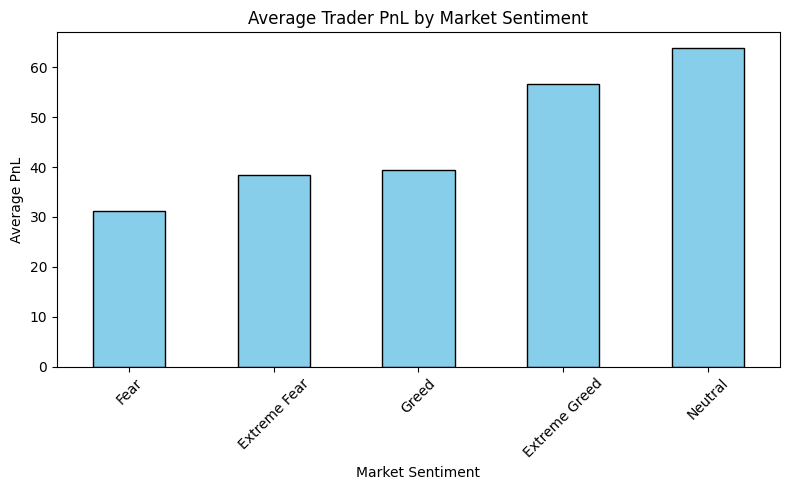

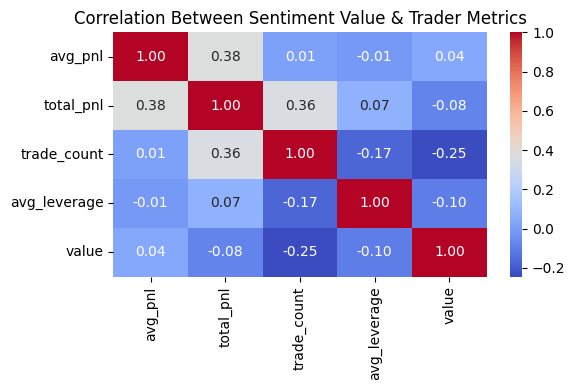

=== Insights Summary ===
Highest average PnL occurs during: Neutral
Lowest average PnL occurs during: Fear
There is a positive correlation: higher greed values tend to increase average PnL.

Merged dataset saved as 'merged_sentiment_trader_data.csv'


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fear_greed_df = pd.read_csv("fear_greed_index.csv")
historical_df = pd.read_csv("historical_data.csv")


# Step 2: Preprocessing
# Convert date formats
fear_greed_df["date"] = pd.to_datetime(fear_greed_df["date"])
historical_df["date"] = pd.to_datetime(historical_df["Timestamp IST"], format="%d-%m-%Y %H:%M").dt.date
historical_df["date"] = pd.to_datetime(historical_df["date"])


# Step 3: Aggregate daily trader performance

daily_perf = historical_df.groupby("date").agg(
    avg_pnl=("Closed PnL", "mean"),
    total_pnl=("Closed PnL", "sum"),
    trade_count=("Closed PnL", "count"),
    avg_leverage=("Start Position", "mean")
).reset_index()


# Step 4: Merge with sentiment data

merged_df = pd.merge(
    daily_perf,
    fear_greed_df[["date", "value", "classification"]],
    on="date",
    how="inner"
)


# Step 5: Analysis & Visualization
-
# Average PnL by sentiment classification
avg_pnl_by_sentiment = merged_df.groupby("classification")["avg_pnl"].mean().sort_values()

plt.figure(figsize=(8, 5))
avg_pnl_by_sentiment.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Trader PnL by Market Sentiment")
plt.ylabel("Average PnL")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Step 6: Correlation heatmap

plt.figure(figsize=(6, 4))
sns.heatmap(merged_df[["avg_pnl", "total_pnl", "trade_count", "avg_leverage", "value"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Sentiment Value & Trader Metrics")
plt.tight_layout()
plt.show()


# Step 7: Insights

print("=== Insights Summary ===")
best_sentiment = avg_pnl_by_sentiment.idxmax()
worst_sentiment = avg_pnl_by_sentiment.idxmin()
print(f"Highest average PnL occurs during: {best_sentiment}")
print(f"Lowest average PnL occurs during: {worst_sentiment}")

if merged_df["value"].corr(merged_df["avg_pnl"]) > 0:
    print("There is a positive correlation: higher greed values tend to increase average PnL.")
else:
    print("There is a negative correlation: higher greed values tend to decrease average PnL.")


# Step 8: Save merged data for further analysis

merged_df.to_csv("merged_sentiment_trader_data.csv", index=False)
print("\nMerged dataset saved as 'merged_sentiment_trader_data.csv'")
